In [1]:
import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, ConfusionMatrixDisplay
import re
import string
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

# Ignore FutureWarning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
true_data = pd.read_csv(r"C:\Users\MrLaptop\Desktop\True.csv")[['text']]
false_data = pd.read_csv(r"C:\Users\MrLaptop\Desktop\Fake.csv")[['text']]

In [3]:
true_data['target'] = 1
false_data['target'] = 0

In [4]:
true_data

,text,target
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [5]:
false_data

,text,target
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
23476,21st Century Wire says As 21WIRE reported earl...,0
23477,21st Century Wire says It s a familiar theme. ...,0
23478,Patrick Henningsen 21st Century WireRemember ...,0
23479,21st Century Wire says Al Jazeera America will...,0


In [6]:
df = pd.concat([false_data,true_data]).sample(frac=1).reset_index(drop=True)

In [7]:
df

,text,target
0,LONDON (Reuters) - Prime Minister Theresa May ...,1
1,It s a rare occasion when a Hollywood legend d...,0
2,ISLAMABAD (Reuters) - Outlining a new strategy...,1
3,The Clinton Crime Syndicate may find a few bum...,0
4,(Reuters) - A divided federal appeals court on...,1
...,...,...
44893,YANGON (Reuters) - Two senior Myanmar governme...,1
44894,Legal Latino Heat filmed a tent city full of...,0
44895,This week President Donald Trump followed thr...,0
44896,BEIJING (Reuters) - One of Australia s largest...,1


Text(0.5, 1.0, 'Target Dist.')

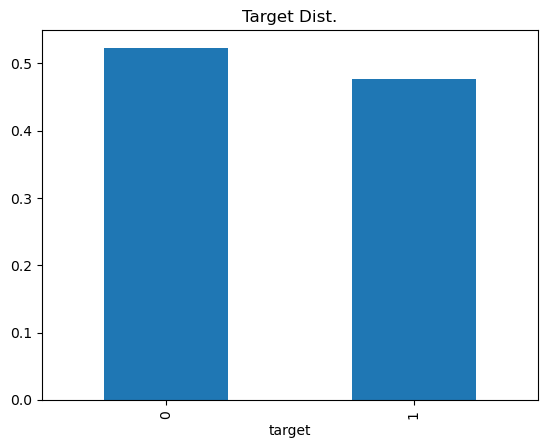

In [8]:
df.target.value_counts(normalize=True).plot(kind='bar')
plt.title('Target Dist.')

In [9]:
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())

6251
0


In [10]:
df.isna().sum()

text      0
target    0
dtype: int64

In [11]:
X = df['text']
y = df['target']

In [12]:
len(X)

38647

In [13]:
def wp(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    text = re.sub(" reuters ","",text)
    text = re.sub("  "," ",text)

    return text

In [14]:
X

0        LONDON (Reuters) - Prime Minister Theresa May ...
1        It s a rare occasion when a Hollywood legend d...
2        ISLAMABAD (Reuters) - Outlining a new strategy...
3        The Clinton Crime Syndicate may find a few bum...
4        (Reuters) - A divided federal appeals court on...
                               ...                        
44892    Senate Minority Leader Harry Reid (D-NV) wrote...
44893    YANGON (Reuters) - Two senior Myanmar governme...
44894     Legal Latino Heat  filmed a tent city full of...
44896    BEIJING (Reuters) - One of Australia s largest...
44897    MADRID (Reuters) - A Spanish judge ordered nin...
Name: text, Length: 38647, dtype: object

In [15]:
X = X.apply(wp)
X

0        london  prime minister theresa may s senior mi...
1        it s a rare occasion when a hollywood legend d...
2        islamabad  outlining a new strategy for the wa...
3        the clinton crime syndicate may find a few bum...
4          a divided federal appeals court on tuesday g...
                               ...                        
44892    senate minority leader harry reid d nv wrote a...
44893    yangon  two senior myanmar government official...
44894     legal latino heat filmed a tent city full of ...
44896    beijing  one of australia s largest independen...
44897    madrid  a spanish judge ordered nine catalan s...
Name: text, Length: 38647, dtype: object

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((30917,), (7730,), (30917,), (7730,))

In [17]:
vectorization = TfidfVectorizer()
XV_train = vectorization.fit_transform(X_train)
XV_test = vectorization.transform(X_test)

In [18]:
score_baseline = y.value_counts(normalize=True).max()
score_baseline

0.5483478665873159

In [19]:
model = LogisticRegression(n_jobs=-1)
model.fit(XV_train,y_train)

LogisticRegression(n_jobs=-1)

In [20]:
pred=model.predict(XV_test)

In [21]:
accuracy_score(y_test, pred)

0.9804657179818888

In [22]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3516
           1       0.98      0.99      0.98      4214

    accuracy                           0.98      7730
   macro avg       0.98      0.98      0.98      7730
weighted avg       0.98      0.98      0.98      7730



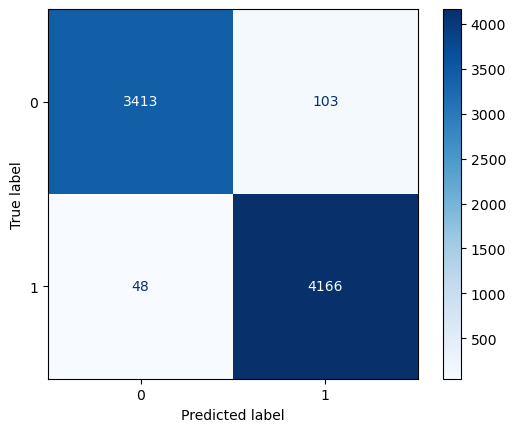

In [23]:
ConfusionMatrixDisplay.from_predictions(y_test, pred,cmap='Blues');

In [24]:
classes_names={1:"True",0:"Fake"}

In [25]:
def output_lable(n):
    return f'This text is {classes_names[n]}'
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wp) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_lr = model.predict(new_xv_test)
    print(f'{output_lable(pred_lr[0])}')

In [26]:
true_string = true_data.sample(frac=1)['text'].head(1).iloc[0]
true_string

'(Reuters) - The state of Hawaii renewed its bid to narrow President Donald Trump’s temporary travel ban, following court rulings which said the state had taken the wrong procedural approach in attempts to challenge the administration’s policy earlier this week. In a court filing late on Friday, Hawaii’s attorney general asked a Honolulu judge to issue an injunction allowing grandparents and other family members to travel to the United States. The U.S. Supreme Court last month let the ban on travel from six Muslim-majority countries go forward with a limited scope, saying it could not apply to anyone with a credible “bona fide relationship” with a U.S. person or entity. The Trump administration then decided that spouses, parents, children, fiancés and siblings would be exempt from the ban, while grandparents and other family members traveling from Iran, Libya, Somalia, Sudan, Syria and Yemen would be barred.  Trump said the measure was necessary to prevent attacks. However, opponents i

In [27]:
false_string = false_data.sample(frac=1)['text'].head(1).iloc[0]
false_string

"Newt Gingrich, who s totally, utterly and completely up Trump s ass except for when he s not, claims to know who will be in the general election four years from now. Gingrich seriously thinks that there could be a Trump/Clinton rematch in 2020. No, seriously, that s what he thinks. The rationale he gave to Politico for that prediction is well beyond ridiculous: The challenge for everybody s going to be,  What if he gets 48 or 49 percent?  Gingrich said in a video interview for POLITICO s  Open Mike  series.  And what if he says:  You know, I like this campaign and stuff. I ain t leaving ? There will then be a Trump Party.' Har de har har, don t make us laugh too hard. It hurts.Trump might like the campaign stuff because it helps him promote his businesses, but whether the GOP even allows him to get very far in the process remains to be seen. That s especially true since oh, wait we haven t even had this election yet!Gingrich still thinks that the  odds are better than even  that Trump

In [28]:
manual_testing(false_string)

This text is Fake


In [29]:
manual_testing(true_string)

This text is True
